In [2]:
import pickle as pkl
import os
import numpy as np

files = os.listdir("results/new_scope/2022-11-22T16:33:05")

In [3]:
bxscal = [f for f in files if f.startswith('BXSCAL_1101')]
bxscal.sort(key=lambda x: x.split('T')[1])

In [4]:
import matplotlib.pyplot as plt

bxscal_data = []

for f in bxscal:
    with open(f"results/new_scope/2022-11-22T16:33:05/{f}", 'rb') as fpkl:
        data = pkl.load(fpkl)
        bxscal_data.append(data)

In [63]:
fig, ax = plt.subplots(figsize=(10, 7))

for i, d in enumerate(bxscal_data):
    ax.plot(np.cumsum(np.array(d['deltaCountArray'])), label=i)

ax.legend()

BXSCAL_1100_2022-11-23T13:19:01.pkl
BXSCAL_1100_2022-11-23T13:19:57.pkl
BXSCAL_1100_2022-11-23T13:20:54.pkl
BXSCAL_1100_2022-11-23T13:21:50.pkl
BXSCAL_1100_2022-11-23T13:22:47.pkl


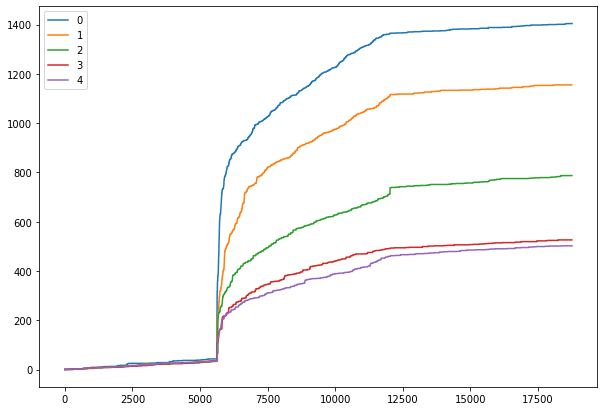

In [5]:
files = os.listdir("results/new_scope/2022-11-23T13:18:15")
bxscal = [f for f in files if f.startswith('BXSCAL_1100')]
bxscal.sort(key=lambda x: x.split('T')[1])
bxscal_data = []

for f in bxscal[1:]:
    print(f)
    with open(f"results/new_scope/2022-11-23T13:18:15/{f}", 'rb') as fpkl:
        data = pkl.load(fpkl)
        bxscal_data.append(data)
fig, ax = plt.subplots(figsize=(10, 7))

for i, d in enumerate(bxscal_data):
    ax.plot(np.cumsum(np.array(d['deltaCountArray'])), label=i)

ax.legend()

In [6]:
bxscal

['BXSCAL_1100_2022-11-23T13:18:17.pkl',
 'BXSCAL_1100_2022-11-23T13:19:01.pkl',
 'BXSCAL_1100_2022-11-23T13:19:57.pkl',
 'BXSCAL_1100_2022-11-23T13:20:54.pkl',
 'BXSCAL_1100_2022-11-23T13:21:50.pkl',
 'BXSCAL_1100_2022-11-23T13:22:47.pkl']

/afs/cern.ch/work/t/tbass/private/MDs/md9044/md9044venv/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


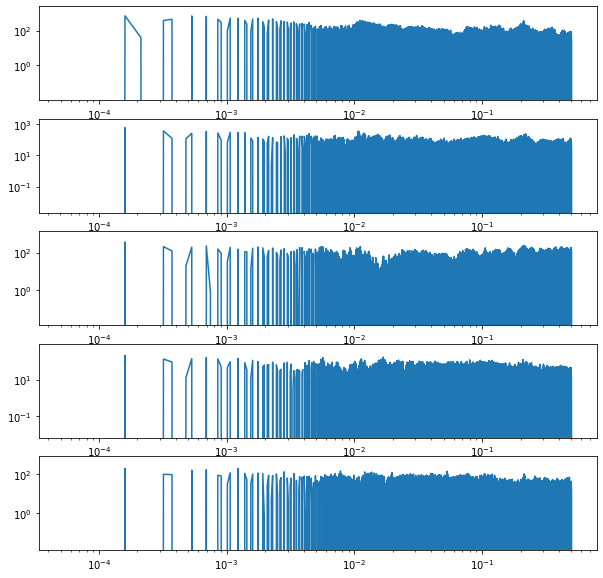

In [7]:
from scipy.fft import rfft, rfftfreq

fig, axs = plt.subplots(len(bxscal_data), 1, figsize=(10, 10))
for i, d in enumerate(bxscal_data):
    yf = rfft(d['deltaCountArray'])
    xf = rfftfreq(len(d['timeArray']))
    axs[i].loglog(xf, yf)
    